<a href="https://colab.research.google.com/github/Daniil71/analysis_researches/blob/main/horses.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
# создадим заголовки через числа, заменим '?' на NaN, отберём нужные, переименуем
horses_df = pd.read_csv('https://raw.githubusercontent.com/obulygin/pyda_homeworks/master/statistics_basics/horse_data.csv', 
                        names = [x for x in range(1,29)], na_values = '?')
horses_df = horses_df[[1, 2, 4, 5, 6, 7, 11, 23 ]]
horses_df.columns =  ['surgery', 'age',  'rectal_temperature', 'pulse', 'respir_rate', 'temp_of_extremities', 'pain', 'outcome' ]
horses_df.head()

,surgery,age,rectal_temperature,pulse,respir_rate,temp_of_extremities,pain,outcome
0,2.0,1,38.5,66.0,28.0,3.0,5.0,2.0
1,1.0,1,39.2,88.0,20.0,NaN,3.0,3.0
2,2.0,1,38.3,40.0,24.0,1.0,3.0,1.0
3,1.0,9,39.1,164.0,84.0,4.0,2.0,2.0
4,2.0,1,37.3,104.0,35.0,NaN,NaN,2.0


In [2]:
# в описании атрибута возраст возможные значения 1 и 2. 9 в df, очевидно, ошибочна. Исходя из факта, что лошади живут ~25 лет,
# 1 значительно больше 9, а взрослой лошадь в файле считается от 6 месяцев, 9 заменим на 2.
horses_df.loc[(horses_df['age'] == 9), 'age'] = 2
horses_df.describe()

,surgery,age,rectal_temperature,pulse,respir_rate,temp_of_extremities,pain,outcome
count,299.000000,300.000000,240.000000,276.000000,242.000000,244.000000,245.00000,299.000000
mean,1.397993,1.080000,38.167917,71.913043,30.417355,2.348361,2.95102,1.551839
std,0.490305,0.271746,0.732289,28.630557,17.642231,1.045054,1.30794,0.737187
min,1.000000,1.000000,35.400000,30.000000,8.000000,1.000000,1.00000,1.000000
25%,1.000000,1.000000,37.800000,48.000000,18.500000,1.000000,2.00000,1.000000
50%,1.000000,1.000000,38.200000,64.000000,24.500000,3.000000,3.00000,1.000000
75%,2.000000,1.000000,38.500000,88.000000,36.000000,3.000000,4.00000,2.000000
max,2.000000,2.000000,40.800000,184.000000,96.000000,4.000000,5.00000,3.000000


In [3]:
#Из 8 атрибутов таблицы лишь 3 являются количественными - ректальная температура, пульс, дыхании. остальные атрибуты суть категории.
# во всех трёх сразу видны выбросы на максимумах и минимумах.

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


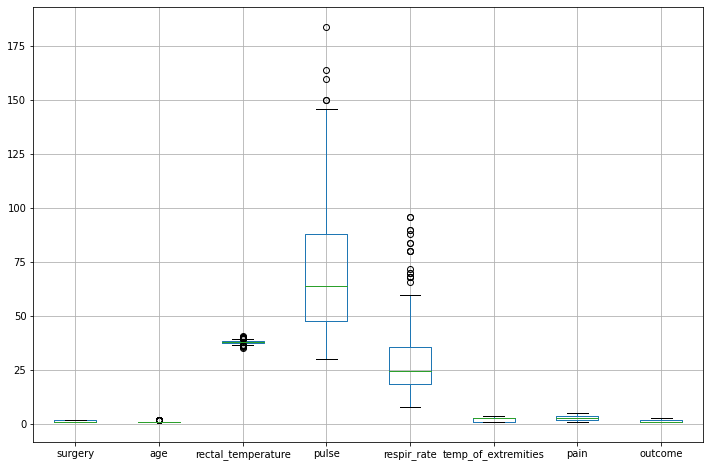

In [4]:
# посмотрим через ящик с усами на выбросы
horses_df.boxplot(figsize = (12,8) )

In [5]:
# уберём все NaN, посмотрим на результат
horses_no_nan = horses_df.dropna()
horses_no_nan.describe()

,surgery,age,rectal_temperature,pulse,respir_rate,temp_of_extremities,pain,outcome
count,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000
mean,1.435065,1.077922,38.163636,70.844156,29.649351,2.220779,2.694805,1.480519
std,0.497383,0.268923,0.731890,29.609690,16.122299,1.061795,1.217132,0.697529
min,1.000000,1.000000,35.400000,36.000000,9.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,37.800000,48.000000,18.000000,1.000000,2.000000,1.000000
50%,1.000000,1.000000,38.200000,60.000000,27.000000,2.500000,3.000000,1.000000
75%,2.000000,1.000000,38.500000,88.000000,36.000000,3.000000,3.000000,2.000000
max,2.000000,2.000000,40.800000,184.000000,88.000000,4.000000,5.000000,3.000000


In [6]:
# потеряли половину данных.
# будем смотреть выборсы
q1 = horses_df['pulse'].quantile(0.25)
q3 = horses_df['pulse'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr) 
upper_bound = q3 + (1.5 * iqr)
pulse_outliers = horses_df[(~horses_df['pulse'].between(lower_bound, upper_bound, inclusive=True)) & (horses_df['pulse'])]

q1 = horses_df['rectal_temperature'].quantile(0.25)
q3 = horses_df['rectal_temperature'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr) 
upper_bound = q3 + (1.5 * iqr)
r_tem_outliers = horses_df[(~horses_df['rectal_temperature'].between(lower_bound, upper_bound, inclusive=True)) & (horses_df['rectal_temperature'])]

q1 = horses_df['respir_rate'].quantile(0.25)
q3 = horses_df['respir_rate'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr) 
upper_bound = q3 + (1.5 * iqr)
respir_outliers = horses_df[(~horses_df['respir_rate'].between(lower_bound, upper_bound, inclusive=True)) & (horses_df['respir_rate'])]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated infavour of `both` or `neither`.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated infavour of `both` or `neither`.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated infavour of `both` or `neither`.


In [7]:
pulse_outliers

,surgery,age,rectal_temperature,pulse,respir_rate,temp_of_extremities,pain,outcome
3,1.0,2,39.1,164.0,84.0,4.0,2.0,2.0
41,2.0,2,39.0,150.0,72.0,NaN,NaN,1.0
55,1.0,2,38.6,160.0,20.0,3.0,3.0,2.0
255,1.0,2,38.8,184.0,84.0,1.0,4.0,2.0
275,1.0,2,38.8,150.0,50.0,1.0,5.0,2.0


In [8]:
# Все выбросы по пульсу у молодых лошадей. Посмотрим сколько вообще молодых лошадей по отношению к взрослым.
# 20% молодых лошадей c выбросами по пульсу, почти все выпадают из норм по дыханию, были без операции и умерли.
print(horses_df['age'].value_counts())
print(horses_df['respir_rate'].mean())
print(horses_df['respir_rate'].std())

1    276
2     24
Name: age, dtype: int64
30.417355371900825
17.64223138513467


In [9]:
print('Кол-во: ', len(r_tem_outliers.index))
r_tem_outliers
# почти все взрослые, ,большинство умерли или была эфтаназия, боль разной степени интенсивности,
# остальные значения в пределах или около норм.распр.

Кол-во:  14


,surgery,age,rectal_temperature,pulse,respir_rate,temp_of_extremities,pain,outcome
20,1.0,1,39.9,72.0,60.0,1.0,5.0,1.0
44,1.0,1,35.4,140.0,24.0,3.0,4.0,3.0
54,2.0,1,40.3,114.0,36.0,3.0,2.0,3.0
75,1.0,2,39.7,100.0,NaN,3.0,2.0,3.0
80,1.0,1,36.4,98.0,35.0,3.0,4.0,2.0
91,2.0,1,40.3,114.0,36.0,3.0,2.0,2.0
99,2.0,1,39.6,108.0,51.0,3.0,2.0,1.0
118,1.0,1,36.5,78.0,30.0,1.0,5.0,1.0
141,2.0,1,36.0,42.0,30.0,NaN,NaN,2.0
238,2.0,1,36.1,88.0,NaN,3.0,3.0,3.0


In [10]:
print('Кол-во: ', len(respir_outliers.index))
respir_outliers
# Сюда же попали и молодые лошади с выбросами в пульсе

Кол-во:  17


,surgery,age,rectal_temperature,pulse,respir_rate,temp_of_extremities,pain,outcome
3,1.0,2,39.1,164.0,84.0,4.0,2.0,2.0
39,1.0,2,39.2,146.0,96.0,NaN,NaN,2.0
41,2.0,2,39.0,150.0,72.0,NaN,NaN,1.0
82,1.0,2,38.1,100.0,80.0,3.0,3.0,1.0
84,1.0,1,37.8,60.0,80.0,1.0,2.0,1.0
103,1.0,2,38.0,140.0,68.0,1.0,3.0,1.0
106,1.0,1,38.3,52.0,96.0,NaN,NaN,1.0
120,1.0,1,39.4,54.0,66.0,1.0,2.0,1.0
125,1.0,1,38.0,42.0,68.0,4.0,3.0,1.0
186,1.0,1,39.3,64.0,90.0,2.0,NaN,1.0


In [11]:
# Объединим все выбросы, удалим дубли. 10% данных - выбросы.
outliers = pd.concat( [respir_outliers, r_tem_outliers, pulse_outliers] )
outliers = outliers.drop_duplicates()
outliers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32 entries, 3 to 275
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   surgery              32 non-null     float64
 1   age                  32 non-null     int64  
 2   rectal_temperature   30 non-null     float64
 3   pulse                32 non-null     float64
 4   respir_rate          29 non-null     float64
 5   temp_of_extremities  27 non-null     float64
 6   pain                 25 non-null     float64
 7   outcome              32 non-null     float64
dtypes: float64(7), int64(1)
memory usage: 2.2 KB


In [12]:
# Сравним df начальный и без выбросов.

In [13]:
horses_df.describe()

,surgery,age,rectal_temperature,pulse,respir_rate,temp_of_extremities,pain,outcome
count,299.000000,300.000000,240.000000,276.000000,242.000000,244.000000,245.00000,299.000000
mean,1.397993,1.080000,38.167917,71.913043,30.417355,2.348361,2.95102,1.551839
std,0.490305,0.271746,0.732289,28.630557,17.642231,1.045054,1.30794,0.737187
min,1.000000,1.000000,35.400000,30.000000,8.000000,1.000000,1.00000,1.000000
25%,1.000000,1.000000,37.800000,48.000000,18.500000,1.000000,2.00000,1.000000
50%,1.000000,1.000000,38.200000,64.000000,24.500000,3.000000,3.00000,1.000000
75%,2.000000,1.000000,38.500000,88.000000,36.000000,3.000000,4.00000,2.000000
max,2.000000,2.000000,40.800000,184.000000,96.000000,4.000000,5.00000,3.000000


In [14]:
horses_without = horses_df[~horses_df.isin(outliers)].dropna( how = 'all')
horses_without.describe()

,surgery,age,rectal_temperature,pulse,respir_rate,temp_of_extremities,pain,outcome
count,267.000000,268.000000,210.000000,244.000000,213.000000,217.000000,220.000000,267.000000
mean,1.411985,1.048507,38.139524,68.147541,26.502347,2.331797,2.963636,1.524345
std,0.493117,0.215238,0.564339,24.555362,12.004176,1.045516,1.330549,0.727008
min,1.000000,1.000000,36.800000,30.000000,8.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,37.800000,48.000000,18.000000,1.000000,2.000000,1.000000
50%,1.000000,1.000000,38.100000,60.000000,24.000000,3.000000,3.000000,1.000000
75%,2.000000,1.000000,38.500000,86.000000,32.000000,3.000000,4.000000,2.000000
max,2.000000,2.000000,39.500000,136.000000,90.000000,4.000000,5.000000,3.000000


Будем смотреть зависимости в таблице без выбросов

In [15]:
horses_filled = horses_without.copy()
# посмотрим количество пропусков в процентах по столбцам
(horses_without.isna().mean()*100).round(2)

surgery                 0.37
age                     0.00
rectal_temperature     21.64
pulse                   8.96
respir_rate            20.52
temp_of_extremities    19.03
pain                   17.91
outcome                 0.37
dtype: float64

Нам нужно изучить детальнее обе температуры, боль, пульс, дыхание.



Боль

In [16]:
#  Cперва посчитаем по категориям.
horses_without['pain'].value_counts()

3.0    60
2.0    48
5.0    39
1.0    37
4.0    36
Name: pain, dtype: int64

In [17]:
# группировка по операции
print(horses_without.groupby(['surgery'])['pain'].value_counts())

surgery  pain
1.0      3.0     34
         5.0     30
         2.0     27
         4.0     25
         1.0      9
2.0      1.0     28
         3.0     26
         2.0     21
         4.0     10
         5.0      9
Name: pain, dtype: int64


In [18]:
# Смущает странная боль = 2, она же депрессия. Если не считать депрессию болью, то наличие боли и факт операции 
# скорее взаимнообратны. Посмотрим навскидку и округлив среднюю боль по факту операции
print(horses_without.groupby(['surgery'])['pain'].mean().round())

surgery
1.0    3.0
2.0    2.0
Name: pain, dtype: float64


In [19]:
# А если с итоговым результатом?
print(horses_without.groupby(['surgery','outcome'])['pain'].value_counts())

surgery  outcome  pain
1.0      1.0      3.0     29
                  2.0     12
                  1.0      9
                  4.0      8
                  5.0      8
         2.0      5.0     16
                  4.0     13
                  2.0      9
                  3.0      4
         3.0      2.0      6
                  5.0      6
                  4.0      4
                  3.0      1
2.0      1.0      1.0     26
                  3.0     21
                  2.0     17
                  4.0      2
                  5.0      2
         2.0      5.0      7
                  3.0      3
                  4.0      2
                  1.0      1
                  2.0      1
         3.0      4.0      6
                  2.0      3
                  3.0      2
                  1.0      1
Name: pain, dtype: int64


In [20]:
print(horses_without.groupby(['surgery','outcome'])['pain'].mean().round())

surgery  outcome
1.0      1.0        3.0
         2.0        4.0
         3.0        4.0
2.0      1.0        2.0
         2.0        4.0
         3.0        3.0
Name: pain, dtype: float64


In [21]:
# В эфтаназии мало случаев, и, судя по разным категоряим боли, они индивидуальны.
# Но даже с учётом эфтаназии вывод довольно простой - выживают в большинстве с несильной болью/отсутствием боли.
# Если была операция и выжила - боль слабая/депрессия, не выжила - сильная боль.
# Если не было операции и выжила - боли не было/слабая, не выжила - сильная боль.
# Заполним округлённым средним.
horses_filled['pain'] = horses_filled['pain'].fillna(horses_without.groupby(['surgery','outcome'])['pain'].transform('mean') ).round()

Пульс

In [22]:
# Помним, что выбросы по пульсу были у молодых лошадей
print(horses_without.groupby([ 'age'])['pulse'].mean())
print(horses_without.groupby([ 'age','pain'])['pulse'].mean())

age
1.0     66.317597
2.0    106.909091
Name: pulse, dtype: float64
age  pain
1.0  1.0      49.114286
     2.0      73.795455
     3.0      58.250000
     4.0      74.766667
     5.0      84.100000
2.0  1.0      92.000000
     2.0     127.000000
     3.0     102.000000
     4.0     114.000000
     5.0     113.000000
Name: pulse, dtype: float64


In [23]:
# Видим, что у молодых действительно пульс выше на ~30-40% и пульс растёт в зависимости от боли.
# интересно, что боль=2(депрессия) выбивается у всех лошадей из вполне линейного роста.  
# Заполним пульс средним по группировке

horses_filled['pulse'] = horses_filled['pulse'].fillna(horses_filled.groupby([ 'age','pain'])['pulse'].transform('mean') )

Температура конечностей

In [24]:
print(horses_filled['temp_of_extremities'].value_counts())

3.0    94
1.0    70
2.0    29
4.0    24
Name: temp_of_extremities, dtype: int64


In [25]:
# По сути , конечности большинства лошадей либо нормальные(1), либо прохладные(3).
# Проверим по боли
print(horses_filled.groupby('pain')['temp_of_extremities'].value_counts())

pain  temp_of_extremities
1.0   1.0                    18
      2.0                    11
      3.0                     6
2.0   3.0                    19
      1.0                    15
      4.0                    10
      2.0                     4
3.0   1.0                    27
      3.0                    22
      2.0                    10
      4.0                     4
4.0   3.0                    21
      1.0                     7
      4.0                     4
      2.0                     3
5.0   3.0                    26
      4.0                     6
      1.0                     3
      2.0                     1
Name: temp_of_extremities, dtype: int64


In [26]:
print(horses_filled.groupby('pain')['temp_of_extremities'].mean())

pain
1.0    1.657143
2.0    2.500000
3.0    2.047619
4.0    2.628571
5.0    2.972222
Name: temp_of_extremities, dtype: float64


In [27]:
# Виден рост температуры в зависимости от боли всё с тем же странно выбивающимся боль=2(депрессия)
# В описании таблицы есть указание на связь высокой ректальной температуры и температуры конечностей.
# Есть связь, но это самые максимальные значения.
print(horses_filled.groupby('rectal_temperature')['temp_of_extremities'].mean())

rectal_temperature
36.8         NaN
36.9    2.000000
37.0    2.000000
37.1    3.000000
37.2    2.333333
37.3    1.666667
37.4    2.000000
37.5    2.400000
37.6    2.714286
37.7    2.333333
37.8    1.454545
37.9    1.500000
38.0    2.250000
38.1    2.300000
38.2    1.923077
38.3    2.333333
38.4    2.000000
38.5    2.294118
38.6    1.750000
38.7    2.500000
38.8    2.000000
38.9    2.500000
39.0    2.333333
39.1    2.000000
39.2    3.666667
39.3    3.333333
39.4    4.000000
39.5    3.000000
Name: temp_of_extremities, dtype: float64


In [28]:
# Будем заполнять округлённым средним по боли
horses_filled['temp_of_extremities'] = horses_filled['temp_of_extremities'].fillna(horses_filled.groupby('pain')['temp_of_extremities'].transform('mean') ).round()

Ректальная температура

In [29]:
# Посмотрим зависимость с темп. конечностей 
# Зависимость от операции 
print(horses_filled.groupby('temp_of_extremities')['rectal_temperature'].mean())
print('--------------------------')
print(horses_filled.groupby('surgery')['rectal_temperature'].mean())

temp_of_extremities
1.0    38.089062
2.0    38.153061
3.0    38.102532
4.0    38.444444
Name: rectal_temperature, dtype: float64
--------------------------
surgery
1.0    38.110169
2.0    38.179121
Name: rectal_temperature, dtype: float64


In [30]:
# Посмотрим зависимость с темп. конечностей и пульсом
print(horses_filled.groupby(['temp_of_extremities', pd.qcut(horses_filled['pulse'], q=4)])['rectal_temperature'].mean())
print('--------------------------')
# Операция и пульс
# Итог и пульс
print(horses_filled.groupby(['surgery', pd.qcut(horses_filled['pulse'], q=4)])['rectal_temperature'].mean())
print('--------------------------')
print(horses_filled.groupby(['outcome', pd.qcut(horses_filled['pulse'], q=4)])['rectal_temperature'].mean())

temp_of_extremities  pulse         
1.0                  (29.999, 48.0]    38.008000
                     (48.0, 64.0]      38.183333
                     (64.0, 84.1]      37.885714
                     (84.1, 136.0]     38.237500
2.0                  (29.999, 48.0]    38.036842
                     (48.0, 64.0]      38.107692
                     (64.0, 84.1]      38.266667
                     (84.1, 136.0]     38.375000
3.0                  (29.999, 48.0]    38.000000
                     (48.0, 64.0]      38.153333
                     (64.0, 84.1]      38.057143
                     (84.1, 136.0]     38.230000
4.0                  (29.999, 48.0]    37.500000
                     (48.0, 64.0]      38.450000
                     (64.0, 84.1]      38.360000
                     (84.1, 136.0]     38.700000
Name: rectal_temperature, dtype: float64
--------------------------
surgery  pulse         
1.0      (29.999, 48.0]    37.915625
         (48.0, 64.0]      38.075000
         (64.0

In [31]:
# В конечном итоге сложно увидеть однозначную линейную зависимость температуры от каких-то показателей
# она в среднем выше нормы, указанной в описании
# Остановимся на очевидной корреляции высокой ректальной температуры и оценке 4 по температуре конечностей,
# сгруппировав так же по операции (видим, что если операция была, то средняя чуть ниже, но при этом при 4 в конечностях высока именно при операции)
print(horses_filled.groupby(['surgery', 'temp_of_extremities'])['rectal_temperature'].mean())

surgery  temp_of_extremities
1.0      1.0                    38.057576
         2.0                    38.034783
         3.0                    38.063265
         4.0                    38.553846
2.0      1.0                    38.122581
         2.0                    38.257692
         3.0                    38.172414
         4.0                    38.160000
Name: rectal_temperature, dtype: float64


In [32]:
horses_filled['rectal_temperature'] = horses_filled['rectal_temperature'].fillna(horses_filled.groupby(['surgery', 'temp_of_extremities'])['rectal_temperature'].transform('mean') )

Дыхание

In [33]:
horses_filled.describe()

,surgery,age,rectal_temperature,pulse,respir_rate,temp_of_extremities,pain,outcome
count,267.000000,268.000000,268.000000,268.000000,213.000000,268.000000,268.000000,267.000000
mean,1.411985,1.048507,38.138155,68.766908,26.502347,2.343284,2.981343,1.524345
std,0.493117,0.215238,0.503043,23.880017,12.004176,0.964575,1.249579,0.727008
min,1.000000,1.000000,36.800000,30.000000,8.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,37.900000,48.000000,18.000000,1.000000,2.000000,1.000000
50%,1.000000,1.000000,38.100000,64.000000,24.000000,3.000000,3.000000,1.000000
75%,2.000000,1.000000,38.400000,84.100000,32.000000,3.000000,4.000000,2.000000
max,2.000000,2.000000,39.500000,136.000000,90.000000,4.000000,5.000000,3.000000


In [34]:
# Дыхание - наименее инфромативный и полезный атрибут из всех ввиду своей слишком большой дисперсиии.
# Даже после удаления выбросов у нас есть очвидно высокие значения.
# При этом через describe легко увидеть общий рост пульса, температуры и дыхания.
# Сгруппируем по квартилям и пульса, и температуры
print(horses_filled.groupby([pd.qcut(horses_filled['rectal_temperature'], q=4), pd.qcut(horses_filled['pulse'], q=4)])['respir_rate'].mean())

rectal_temperature  pulse         
(36.799, 37.9]      (29.999, 48.0]    19.888889
                    (48.0, 64.0]      28.428571
                    (64.0, 84.1]      27.500000
                    (84.1, 136.0]     29.300000
(37.9, 38.1]        (29.999, 48.0]    20.500000
                    (48.0, 64.0]      27.428571
                    (64.0, 84.1]      20.833333
                    (84.1, 136.0]     34.727273
(38.1, 38.4]        (29.999, 48.0]    19.062500
                    (48.0, 64.0]      24.666667
                    (64.0, 84.1]      30.307692
                    (84.1, 136.0]     30.500000
(38.4, 39.5]        (29.999, 48.0]    22.000000
                    (48.0, 64.0]      30.307692
                    (64.0, 84.1]      31.666667
                    (84.1, 136.0]     35.000000
Name: respir_rate, dtype: float64


In [35]:
horses_filled['respir_rate'] = horses_filled['respir_rate'].fillna(horses_filled.groupby([pd.qcut(horses_filled['rectal_temperature'], q=4), pd.qcut(horses_filled['pulse'], q=4)])['respir_rate'].transform('mean') )

In [36]:
# Осталась одна строка с Nan. Проверим по боли и температуре конечностей
horses_filled[pd.isnull(horses_filled).any(axis=1)]

,surgery,age,rectal_temperature,pulse,respir_rate,temp_of_extremities,pain,outcome
132,NaN,1.0,38.0,48.0,20.0,3.0,4.0,NaN


In [37]:
print(horses_filled[(horses_filled['temp_of_extremities']==3.0) & (horses_filled['pain'] == 4.0)]['outcome'].mean())
print(horses_filled[(horses_filled['temp_of_extremities']==3.0) & (horses_filled['pain'] == 4.0)]['surgery'].mean())

2.1621621621621623
1.2432432432432432


In [38]:
# Заменим через fillna(inplace=True) налету 
horses_filled.fillna(value = {'surgery':1.0,'outcome':2.0}, inplace = True)

Итог

In [39]:
horses_filled.describe()

,surgery,age,rectal_temperature,pulse,respir_rate,temp_of_extremities,pain,outcome
count,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000
mean,1.410448,1.048507,38.138155,68.766908,26.822498,2.343284,2.981343,1.526119
std,0.492835,0.215238,0.503043,23.880017,10.966805,0.964575,1.249579,0.726227
min,1.000000,1.000000,36.800000,30.000000,8.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,37.900000,48.000000,20.000000,1.000000,2.000000,1.000000
50%,1.000000,1.000000,38.100000,64.000000,25.500000,3.000000,3.000000,1.000000
75%,2.000000,1.000000,38.400000,84.100000,32.000000,3.000000,4.000000,2.000000
max,2.000000,2.000000,39.500000,136.000000,90.000000,4.000000,5.000000,3.000000
